In [12]:
#imports
import numpy as np
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from scipy.interpolate import interp1d
from scipy.io import wavfile

In [13]:
def apply_transfer(signal, transfer, interpolation='linear'):
    constant = np.linspace(-1, 1, len(transfer))
    interpolator = interp1d(constant, transfer, interpolation)
    return interpolator(signal)

In [14]:
# hard limiting
def limiter(x, treshold=0.8):
    transfer_len = 1000
    transfer = np.concatenate([ np.repeat(-1, int(((1-treshold)/2)*transfer_len)),
                                np.linspace(-1, 1, int(treshold*transfer_len)),
                                np.repeat(1, int(((1-treshold)/2)*transfer_len)) ])
    return apply_transfer(x, transfer)

In [15]:
# smooth compression: if factor is small, its near linear, the bigger it is the
# stronger the compression
def arctan_compressor(x, factor=2):
    constant = np.linspace(-1, 1, 1000)
    transfer = np.arctan(factor * constant)
    transfer /= np.abs(transfer).max()
    return apply_transfer(x, transfer)

In [16]:
sr, x = wavfile.read("Nouvel enregistrement.wav")
x = x / np.abs(x).max() # x scale between -1 and 1

In [17]:
#Limiter
x2 = limiter(x)
x2 = np.int16(x2 * 32767)
wavfile.write("output_limit.wav", sr, x2)

In [18]:
#The transformed audio
x3 = arctan_compressor(x)
x3 = np.int16(x3 * 32767)
wavfile.write("output_comp.wav", sr, x3)

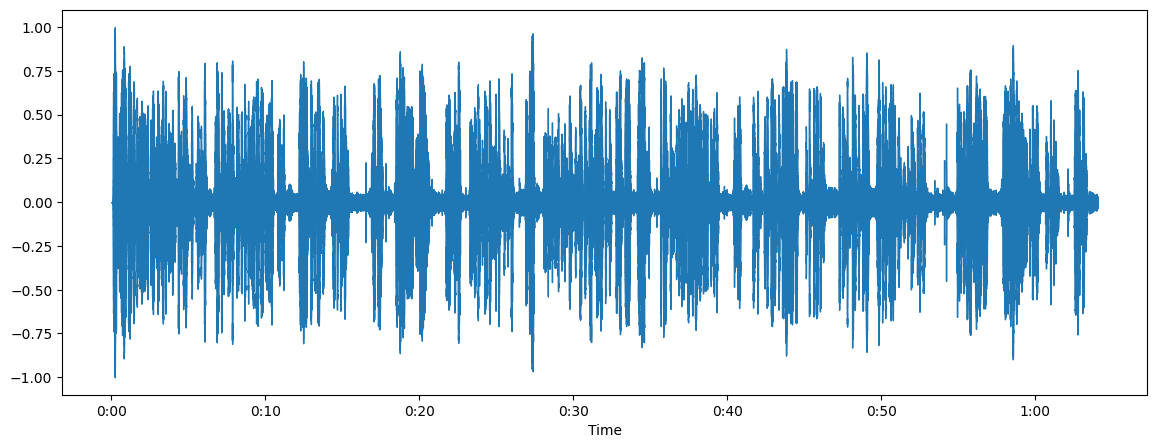

In [19]:
#Visualizing
audio_data = "output_comp.wav"
x , sr = librosa.load(audio_data)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

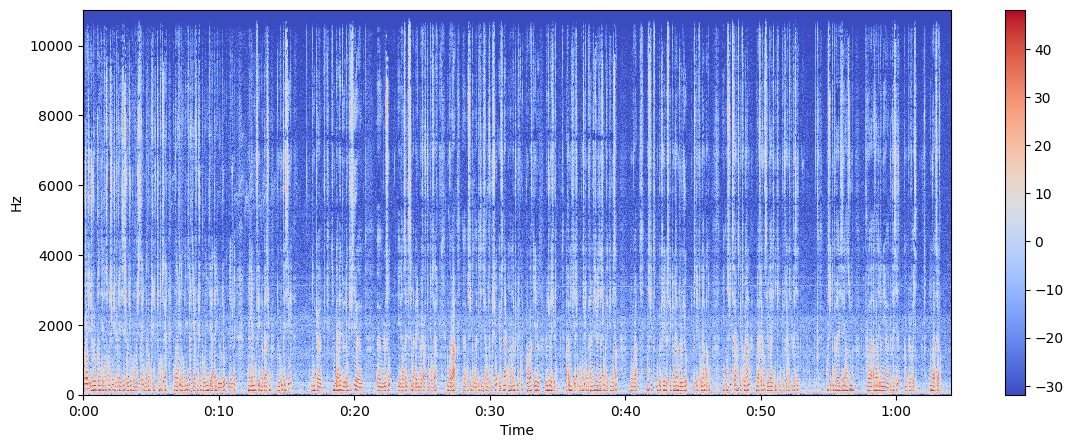

In [20]:
#Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

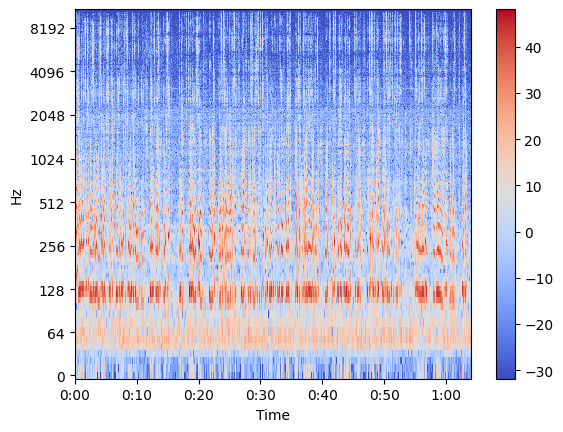

In [21]:
#Logarithmic frequency
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

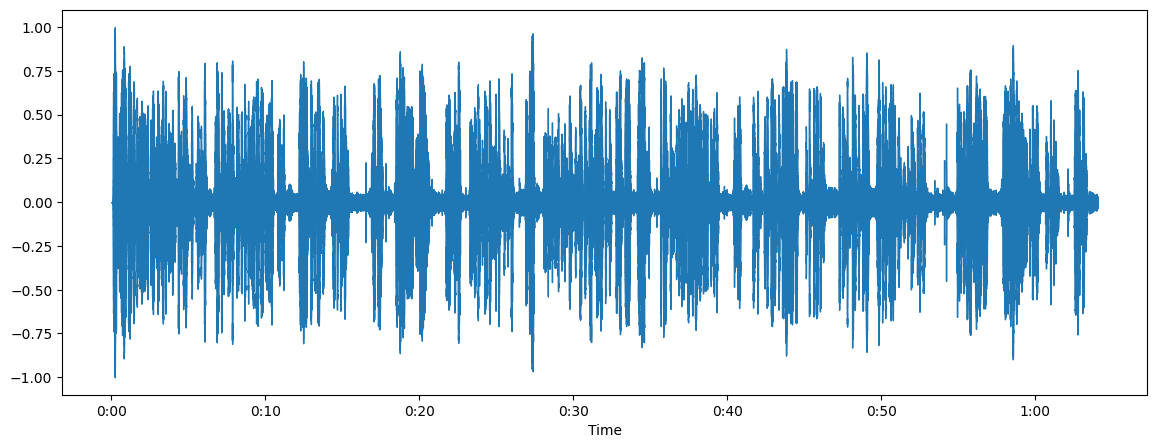

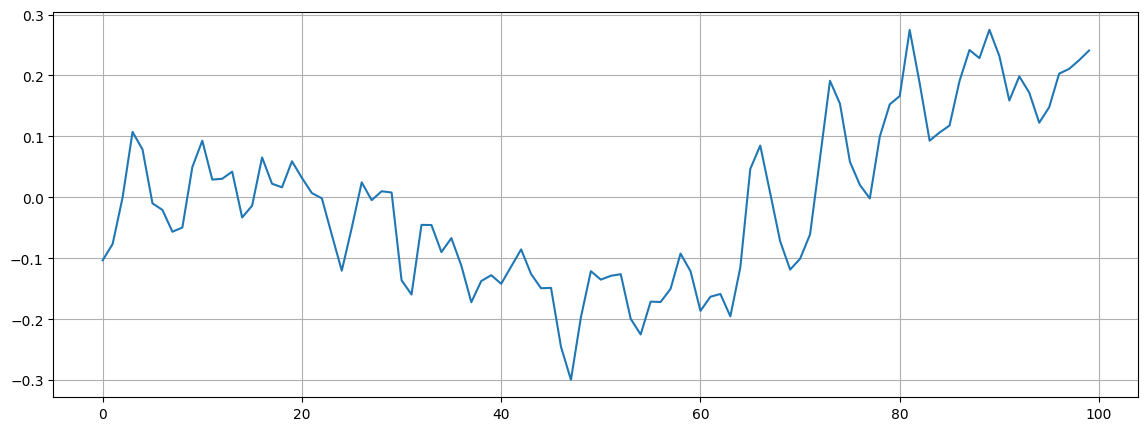

In [22]:
#Zooming
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()